# Timing study

In [12]:
import timing
import fib

In [13]:
help(timing.timed_call)

Help on function timed_call in module timing:

timed_call(func, *args, **kwargs)
    Call func(*args,**kwargs), ignoring its return value
    and returning its running time instead



In [14]:
def fib_memoized_timing(n):
    "Measure the time taken to call fib.fib_memoized(n) with an empty cache"
    fib.clear_fib_cache()
    return timing.timed_call(fib.fib_memoized,n)

fib_inputs = list(range(35))
print("Timing fib.fib...")
fib_rec_times = [
    timing.timed_call(fib.fib, x)  # recursive implementation
    for x in fib_inputs
]
print("Timing fib.fib_memoized...")
fib_memoized_times = [
    fib_memoized_timing(x)  # memoized implementation
    for x in fib_inputs
]
print("Timing fib.fib_iterative...")
fib_iter_times = [
    timing.timed_call(fib.fib_iterative, x)
    for x in fib_inputs
]

Timing fib.fib...
Timing fib.fib_memoized...
Timing fib.fib_iterative...


In [16]:
# need to 
#     python3 -m pip install matplotlib
# before this will work!
import matplotlib.pyplot as plt

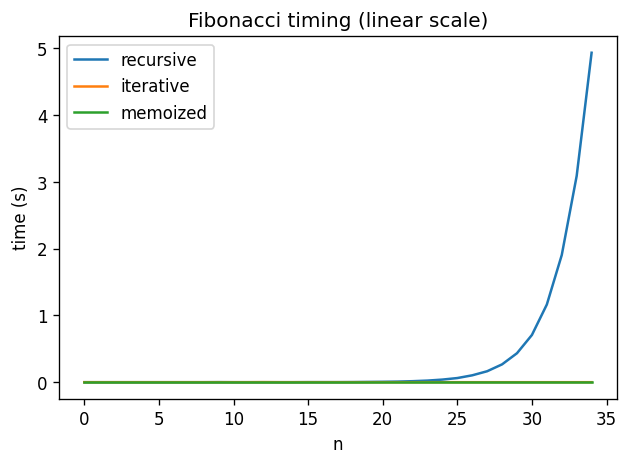

In [18]:
plt.figure(figsize=(6,4),dpi=120)
plt.plot(fib_inputs,fib_rec_times,label="recursive",ls="-",marker="")
plt.plot(fib_inputs,fib_iter_times,label="iterative",ls="-",marker="")
plt.plot(fib_inputs,fib_memoized_times,label="memoized",ls="-",marker="")
#plt.yscale("log")
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title("Fibonacci timing (linear scale)")
plt.legend()
plt.show()

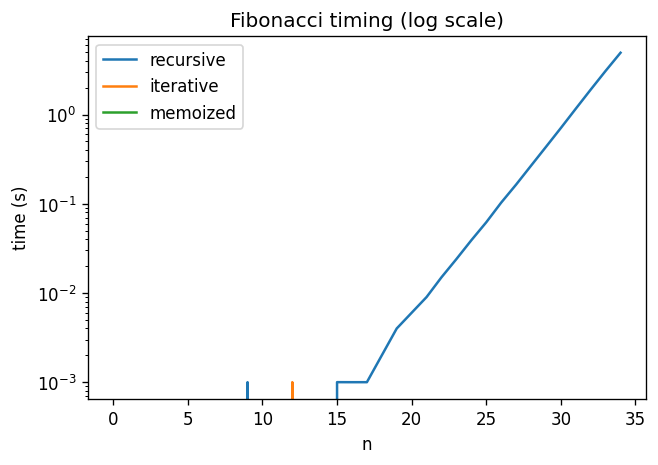

In [19]:
plt.figure(figsize=(6,4),dpi=120)
plt.plot(fib_inputs,fib_rec_times,label="recursive",ls="-",marker="")
plt.plot(fib_inputs,fib_iter_times,label="iterative",ls="-",marker="")
plt.plot(fib_inputs,fib_memoized_times,label="memoized",ls="-",marker="")
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title("Fibonacci timing (log scale)")
plt.legend()
plt.show()

It seems like

    log(running_time_fib(n)) ~ a*n + b

which would mean

    running_time_fib(n) ~ exp(a*n + b) = exp(a*n)exp(b) = const*exp(a*n)

# Testing memoized `fib`

In [20]:
import fib

[fib.fib_memoized(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [21]:
[fib.fib(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [22]:
fib.fib_memoized(8)

21

In [24]:
fib.fib(8)

21

# Call count study

In [3]:
# Reminder: fib.py has the count_calls decorator
# applied to fib()
import fib
import decs
decs.call_counts = {}

In [4]:
fib.fib(3)

2

In [5]:
decs.call_counts

{'fib': 5}

In [7]:
def get_fib_call_count(n):
    """
    Return the total number of calls to fib.fib made as a result
    of calling fib.fib(n)
    """
    decs.call_counts = {}
    fib.fib(n)
    return decs.call_counts["fib"]

In [8]:
get_fib_call_count(0)

1

In [9]:
get_fib_call_count(3)

5

In [10]:
[get_fib_call_count(x) for x in range(15)]

[1, 1, 3, 5, 9, 15, 25, 41, 67, 109, 177, 287, 465, 753, 1219]

Theorem: `fib_call_count(n)` returns `2*fib(n+1) - 1`

In [27]:
[ 2*fib.fib_iterative(x+1)-1 for x in range(15)]

[1, 1, 3, 5, 9, 15, 25, 41, 67, 109, 177, 287, 465, 753, 1219]